In [1]:
import xcdat
from xcdat.regridder import grid
import cdms2


In [2]:
# dataset to use
# dpath = '/p/css03/esgf_publish/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/*.nc'
# dpath = '20180215.DECKv1b_H1.ne30_oEC.edison_01_200001_200101_climo.nc'
dpath = '/p/user_pub/e3sm/zhang40/xcdat_test_e3sm/TS_185001_201312.nc'
# open dataset
ds = xcdat.open_dataset(dpath)


In [3]:
# create output grid
out_grid = grid.create_uniform_grid(-90, 90, 4.0, -180, 180, 5.0)

# regrid
ds2 = ds.regridder.regrid("TS", out_grid, tool="xesmf", method="bilinear")

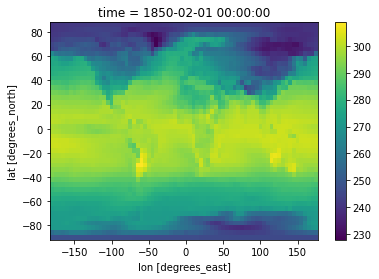

In [4]:
ds2[0,].plot()

In [5]:
ds3 = ds.regridder.regrid("TS", out_grid, tool="xesmf", method="conservative")

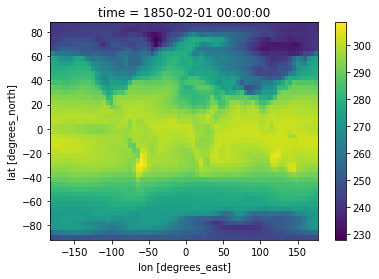

In [6]:
ds3[0,].plot()

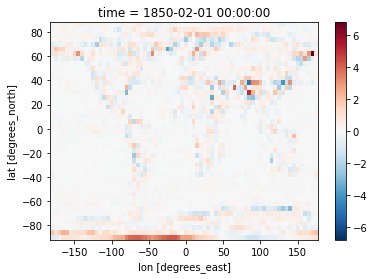

In [7]:
(ds3[0,]-ds2[0,]).plot()

In [8]:
fin = cdms2.open(dpath)

In [9]:
var = fin('TS')

In [10]:
# Note input for create uniform grids between cdms2 and xcdat are differet.
out_grid2=cdms2.grid.createUniformGrid(-90, 45, 4.0, -180, 72, 5.0)

In [11]:
var2 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="linear")

In [12]:
var3 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="conservative")


coordMin =  -90.00, boundMin =  -90.00, coordMax =   90.00, boundMax =   90.00
              


In [13]:
# The difference of data value resulted from cdms2 and xcdat regriders are always multiples of 1.52587890625e-05 /megabits
var2[0,]-ds2[0,]

variable_22
masked_array(
  data=[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, -3.0517578125e-05, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, -1.52587890625e-05, 0.0, ..., 1.52587890625e-05, 0.0, 0.0],
        [0.0, 0.0, -1.52587890625e-05, ..., 0.0, 0.0, 1.52587890625e-05],
        [1.52587890625e-05, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [14]:
ds2[0,].shape

(45, 72)

In [15]:
var3[0,]-ds3[0,]

variable_28
masked_array(
  data=[[0.0, 0.0, 1.52587890625e-05, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, -3.0517578125e-05],
        [0.0, 0.0, -3.0517578125e-05, ..., 0.0, 0.0, 0.0],
        ...,
        [1.52587890625e-05, 1.52587890625e-05, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, -3.0517578125e-05, ..., 0.0, 0.0, 1.52587890625e-05],
        [-1.52587890625e-05, 1.52587890625e-05, 1.52587890625e-05, ...,
         1.52587890625e-05, 0.0, -1.52587890625e-05]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)